# Graus de Liberdade

Este notebook tem como objetivo explicar o conceito de **graus de liberdade (degrees of freedom, df)** de forma intuitiva, numérica e visual.

Vamos construir a intuição passo a passo, entender seu papel na **variância amostral** e nos **testes estatísticos** (como ANOVA), e visualizar como os graus de liberdade afetam distribuições amostrais.

## 1. Intuição Conceitual

Os **graus de liberdade** representam o **número de valores independentes** que podem variar em um conjunto de dados antes que uma restrição matemática os prenda.

**Exemplo:**
Suponha três números cuja média é 10. Se chamarmos esses números de $x_1$, $x_2$ e $x_3$, temos:

$$ \frac{x_1 + x_2 + x_3}{3} = 10 $$

Ou seja, $x_1 + x_2 + x_3 = 30$. Depois de escolher livremente dois números, o terceiro já está determinado:

$$ x_3 = 30 - (x_1 + x_2) $$

Logo, apenas **2 valores são livres para variar**. Dizemos que o conjunto tem **2 graus de liberdade**.

In [2]:
# Exemplo numérico simples
import numpy as np

x1, x2 = 12, 9
x3 = 30 - (x1 + x2)
print(f"x1 = {x1}, x2 = {x2}, x3 = {x3}")
print("A média é:", np.mean([x1, x2, x3]))

x1 = 12, x2 = 9, x3 = 9
A média é: 10.0


## 2. Graus de Liberdade na Variância Amostral

Ao calcular a **variância amostral**, usamos:

$$ s^2 = \frac{\sum (x_i - \bar{x})^2}{n - 1} $$

Por que dividimos por $(n - 1)$ e não por $n$?

Porque o cálculo da média $\bar{x}$ impõe uma **restrição**: a soma dos desvios em relação à média é sempre zero.

$$ \sum (x_i - \bar{x}) = 0 $$

Isso faz com que apenas $(n - 1)$ dos desvios sejam livres para variar. O último é automaticamente determinado pelos anteriores.

In [3]:
# Demonstração: soma dos desvios é sempre zero
dados = np.array([5, 8, 10, 7])
media = np.mean(dados)
desvios = dados - media

print("Dados:", dados)
print("Média:", round(media, 2))
print("Desvios:", np.round(desvios, 2))
print("Soma dos desvios:", np.sum(desvios))

Dados: [ 5  8 10  7]
Média: 7.5
Desvios: [-2.5  0.5  2.5 -0.5]
Soma dos desvios: 0.0


## 3. Aplicação à ANOVA

No teste **ANOVA (Análise de Variância)**, comparamos a variabilidade **entre grupos** e **dentro dos grupos**. Cada fonte de variabilidade tem seus próprios graus de liberdade:

| Fonte de variação | Soma de Quadrados | Graus de Liberdade | Quadrado Médio |
|-------------------|-------------------|--------------------|----------------|
| Entre grupos | $SS_{entre}$ | $k - 1$ | $MS_{entre} = SS_{entre}/(k-1)$ |
| Dentro dos grupos | $SS_{dentro}$ | $N - k$ | $MS_{dentro} = SS_{dentro}/(N-k)$ |
| Total | $SS_{total}$ | $N - 1$ |  |

A estatística de teste é:

$$ F = \frac{MS_{entre}}{MS_{dentro}} $$

Os graus de liberdade determinam a forma da **distribuição F** usada para avaliar a significância do resultado.

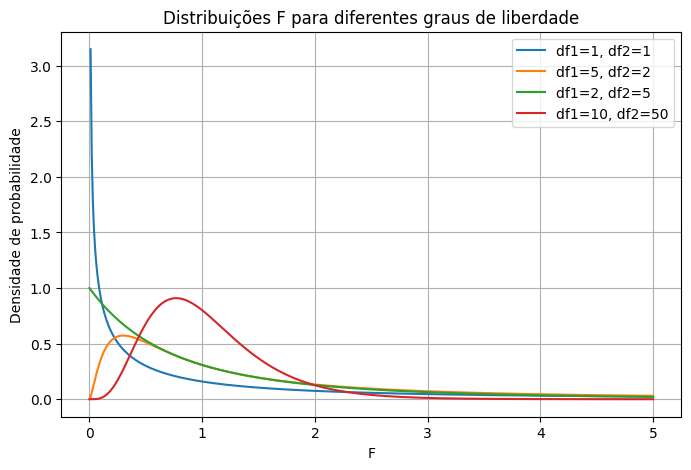

In [4]:
# Exemplo: distribuição F com diferentes graus de liberdade
import matplotlib.pyplot as plt
import scipy.stats as st

x = np.linspace(0, 5, 500)

df_pairs = [(1, 1), (5, 2), (2, 5), (10, 50)]
plt.figure(figsize=(8, 5))
for d1, d2 in df_pairs:
    plt.plot(x, st.f.pdf(x, d1, d2), label=f"df1={d1}, df2={d2}")

plt.title("Distribuições F para diferentes graus de liberdade")
plt.xlabel("F")
plt.ylabel("Densidade de probabilidade")
plt.legend()
plt.grid(True)
plt.show()

Observe que, conforme os **graus de liberdade aumentam**, a distribuição F se torna **mais concentrada** em torno de 1. Isso reflete o fato de que, com mais dados, há menos variabilidade amostral.

## 4. Simulação: influência de df na variância amostral

Vamos verificar empiricamente o impacto de usar $n$ ou $(n-1)$ no denominador da variância.

In [5]:
np.random.seed(42)

n = 5
pop = np.random.normal(100, 15, 10000)
amostras = [np.random.choice(pop, n, replace=False) for _ in range(5000)]

var_n = [np.var(a, ddof=0) for a in amostras]
var_n1 = [np.var(a, ddof=1) for a in amostras]

print("Variância populacional verdadeira:", np.var(pop))
print("Média das variâncias amostrais com n (tendenciosa):", np.mean(var_n))
print("Média das variâncias amostrais com n-1 (não tendenciosa):", np.mean(var_n1))

Variância populacional verdadeira: 226.53811246739593
Média das variâncias amostrais com n (tendenciosa): 184.1795891512304
Média das variâncias amostrais com n-1 (não tendenciosa): 230.22448643903797


Quando dividimos por $(n-1)$, a variância amostral se torna uma **estimativa não tendenciosa** da variância populacional. Esse ajuste corrige a perda de um grau de liberdade associada ao cálculo da média.

## Conclusão

Os **graus de liberdade** medem quantas informações independentes permanecem disponíveis após aplicar restrições matemáticas aos dados.

- Na variância: perdemos 1 grau ao calcular a média.
- Na ANOVA: os graus de liberdade são particionados entre as fontes de variação.

Formalmente:

$$ df = (\text{número de observações independentes}) - (\text{número de restrições}) $$